In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [ ]:
G = nx.Graph()

In [ ]:
G = nx.Graph()

G.add_nodes_from([
    (0, {"color": "white"}),
    (1, {"color": "white"}),
    (2, {"color": "white"}),
    (3, {"color": "white"}),
    (4, {"color": "white"}),
    (5, {"color": "white"}),
])

G.add_edge(0,1)
G.add_edge(0,2)

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)
G.add_edge(2,4)

G.add_edge(1,5)
G.add_edge(3,5)

In [ ]:
def visualise_graph(input_G):
    colors = []

    for node in input_G:
        colors.append(input_G.nodes[node]['color'])
        
    nx.draw(G, with_labels=True, node_color=colors, font_weight='bold')
    plt.show()

In [ ]:
G = nx.turan_graph(10, 4)
for node in G:
    G.nodes[node]['color'] = 'white'

In [ ]:
visualise_graph(G)

In [ ]:
class DFSWrapper(object):
    
    def __init__(
        self,
        graph,
        color_domain
    ):
        self.graph = graph
        self.color_domain = color_domain
        self.n = graph.number_of_nodes()
        
        self.result = None
        
    def get_constraint(self, graph, i, v):
        if graph is None:
            return None
        for node in graph.neighbors(i):
            if graph.nodes[node]['color'] == v:
                return False
        return True    
        
    def run_colorization(self):
        self.result = self.dfs(0, self.graph)
        if self.result is None:
            print('Solution does not exist')
        else:
            print('Solution was found')
            visualise_graph(self.result)

    def dfs(self, i, g_t):
        g = g_t.copy()
        if i > self.n - 1:
            return g
        for v in self.color_domain:
            p = self.get_constraint(g, i, v)
            if p:
                g.nodes[i]['color'] = v
                g = self.dfs(i+1, g)
                if g is not None:
                    return g
        return None

In [ ]:
dfs_temp = DFSWrapper(
    G, 
    ['red', 'green', 'blue', 'yellow']
)

In [ ]:
dfs_temp.run_colorization()

In [ ]:
pd.DataFrame(np.random.randint(low=0, high=20, size=(10,2)))

In [ ]:
np.unique(np.random.randint(low=0, high=2, size=(10,2)), axis=0)

In [ ]:
np.random.randint(low=0, high=2, size=(10,2))

In [2]:
def peshka_rule_attack(x, y, x_ref, y_ref):
    possible_coords = [
        (x-1, y+1),
        (x-1, y-1),
        (x, y)
    ]
    for x_pos, y_pos in possible_coords:
        if x_pos == x_ref and y_pos == y_ref:
            return True
    return False

def peshka_rule_defense(x, y, desk, n):
    possible_coords = [
        (x-1, y+1),
        (x-1, y-1),
        (x, y)
    ]
    figure_sum = sum(desk[el[0], el[1]] for el in possible_coords if (0<=el[0]<n) and (0<=el[1]<n)) 
    return bool(figure_sum)

def king_rule_attack(x, y, x_ref, y_ref):
    possible_coords = [
        (x+1, y+1),
        (x+1, y),
        (x+1, y-1),
        (x-1, y+1),
        (x, y+1),
        (x, y-1),
        (x-1, y-1),
        (x-1, y),
        (x, y),
    ]
    for x_pos, y_pos in possible_coords:
        if x_pos == x_ref and y_pos == y_ref:
            return True
    return False

def king_rule_defense(x, y, desk, n):
    possible_coords = [
        (x+1, y+1),
        (x+1, y),
        (x+1, y-1),
        (x-1, y+1),
        (x, y+1),
        (x, y-1),
        (x-1, y-1),
        (x-1, y),
        (x, y),
    ]
    figure_sum = sum(desk[el[0], el[1]] for el in possible_coords if (0<=el[0]<n) and (0<=el[1]<n)) 
    return bool(figure_sum)

def tura_rule_attack(x, y, x_ref, y_ref):
    if x == x_ref or y == y_ref:
        return True
    else:
        return False
    
def tura_rule_deffense(x, y, desk, n):
    figure_sum = desk[x,y] + desk[x,:].sum() + desk[:,y].sum()
    return bool(figure_sum)

In [3]:
class ChessField(object):
    
    def __init__(
        self,
        size: int,
        figure_config,
    ):
        self.desk = np.zeros((size, size))
        self.size = size
        self.figures = []
        self.figure_config = dict()
        for el in figure_config:
            n_figures, figure_color, figure_number, figure_name, figure_rule = el
            self.figure_config[figure_name] = {
                "color": figure_color,
                "n": n_figures,
                "number": figure_number,
                "const_def": figure_rule[0],
                "const_atack": figure_rule[1]
            }
            coords = np.random.randint(low=0, high=size, size=(n_figures, 2))
            for coord in coords:
                self.desk[coord[0], coord[1]] = figure_number
            self.figures += [(coord, figure_name) for coord in coords]
            
    def show_field(self):
        field = np.zeros((self.size,self.size,3), dtype=np.uint8)
        for figure in self.figures:
            coord, name = figure
            field[coord[0], coord[1]] = self.figure_config[name]['color']

        plt.imshow(field)
        plt.show()
        
    def zero_field(self):
        self.desk = np.zeros((self.size, self.size))
        self.figure = [(None, el[1]) for el in self.figures]
        
        
class DFSChessWrapper(object):
    
    def __init__(
        self,
        chess_class
    ):
        self.graph = chess_class
        self.n = len(chess_class.figures)
        
        self.result = None
        
    def get_constraint(self, graph, i, x, y):
        
        if graph is None:
            return None
        
        _, figure_name = graph.figures[i]
        if graph.figure_config[figure_name]['const_def'](x, y, graph.desk, graph.size):
            return False
        
        for idx, figure in enumerate(graph.figures):
            if idx != i:
                figure_coord, figure_name = figure
                if figure_coord is not None:
                    do_strike = graph.figure_config[figure_name]['const_atack'](figure_coord[0], figure_coord[1], x, y)
                    if do_strike:
                        return False
        return True   
        
    def run_colorization(self):
        self.graph.zero_field()
        self.result = self.dfs(0, self.graph)
        if self.result is None:
            print('Solution does not exist')
        else:
            print('Solution was found')
            self.result.show_field()

    def dfs(self, i, g_t):
        g = deepcopy(g_t)
        if i >= self.n:
            return g
        for x in range(0, self.graph.size):
            for y in range(0, self.graph.size):
                p = self.get_constraint(g, i, x, y)
                if p:
                    g.figures[i] = (np.array([x, y]), g.figures[i][1])
                    g.desk[x,y] = g.figure_config[g.figures[i][1]]['number']
                    g = self.dfs(i+1, g)
                    if g is not None:
                        return g
        return None

In [237]:
temp_field = ChessField(
    10,
    # R G B
    [
        (2, (255, 0, 0), 1, 'peshka', (peshka_rule_defense, peshka_rule_attack)),
        (5, (0, 255, 0), 2, 'king', (king_rule_defense, king_rule_attack)),
        (4, (0, 0, 255), 3, 'tura', (tura_rule_deffense, tura_rule_attack))
    ]
)

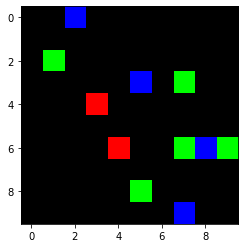

In [238]:
temp_field.show_field()

Solution was found


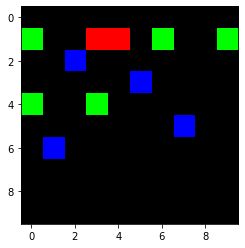

In [239]:
temp_dfs_chess = DFSChessWrapper(temp_field)

temp_dfs_chess.run_colorization()

In [240]:
class FilteringChessWrapper(object):
    
    def __init__(
        self,
        chess_class
    ):
        self.graph = deepcopy(chess_class)
        self.n = len(chess_class.figures)
        
        self.result = None
        
        universal_domain = [(x, y) for x in range(0, self.graph.size) for y in range(0, self.graph.size)]
        self.domains = [deepcopy(universal_domain) for _ in range(len(self.graph.figures))]
        for i in range(len(self.domains) - 1):
            n_to_drop = np.random.randint(0, len(universal_domain)-2)
            for _ in range(n_to_drop):
                drop_id = np.random.randint(0, len(self.domains[i]))
                self.domains[i].pop(drop_id)
        last_domain_preserve = np.random.randint(0, len(universal_domain))
        self.domains[-1] = [self.domains[-1][last_domain_preserve]]
        
    def get_constraint_one(self, graph, i, xi, yi, j, xj, yj):
        
        _, figure_name = graph.figures[i]
        if graph.figure_config[figure_name]['const_atack'](xi, yi, xj, yj):
            return False
        
        _, figure_name = graph.figures[j]
        if graph.figure_config[figure_name]['const_atack'](xj, yj, xi, yi):
            return False
        
        return True
    
    def get_constraint(self, graph, i, vi, j, dj):
        return not any(self.get_constraint_one(graph, i, vi[0], vi[1], j, vj[0], vj[1]) for vj in dj)
        
    def run_colorization(self):
        for i in range(len(self.graph.figures)):
            self.filtering(i)
            if len(self.domains[i]) == 0:
                print('Solution was not found')
                return None
            self.domains[i] = [self.domains[i][0]]
            print([len(el) for el in self.domains])
            
        for i in range(len(self.domains)):
            self.graph.figures[i] = (np.array(self.domains[i][0]), self.graph.figures[i][1])
            
        self.graph.show_field()

    def filtering(self, i):
        for j in range(0, len(self.graph.figures)):
            if j != i:
                self.revise(i, j)
        
    def revise(self, i, j):
        old_domain = deepcopy(self.domains[i])
        current_domain = deepcopy(self.domains[i])
        for  v in current_domain:
            if self.get_constraint(self.graph, i, v, j, self.domains[j]):
                current_domain.remove(v)
                
        if set(old_domain) != set(current_domain):
            self.domains[i] = current_domain
            for k in range(0, len(self.graph.figures)):
                if k not in [i, j]:
                    self.revise(i, k)
                
    def handle_new_domain(self, i, k, domain):
        self.domains[i] = domain
        self.revise(i, k)

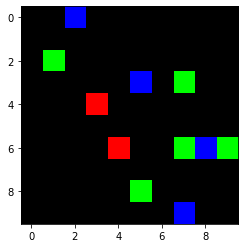

In [241]:
temp_field.show_field()

In [242]:
filt_temp = FilteringChessWrapper(temp_field)

[len(el) for el in filt_temp.domains]

[29, 37, 90, 44, 53, 69, 53, 13, 25, 23, 1]

[1, 37, 90, 44, 53, 69, 53, 13, 25, 23, 1]
[1, 1, 90, 44, 53, 69, 53, 13, 25, 23, 1]
[1, 1, 1, 44, 53, 69, 53, 13, 25, 23, 1]
[1, 1, 1, 1, 53, 69, 53, 13, 25, 23, 1]
[1, 1, 1, 1, 1, 69, 53, 13, 25, 23, 1]
[1, 1, 1, 1, 1, 1, 53, 13, 25, 23, 1]
[1, 1, 1, 1, 1, 1, 1, 13, 25, 23, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 25, 23, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


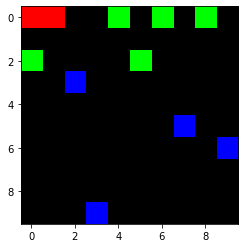

In [243]:
filt_temp.run_colorization()

In [244]:
class DBChessWrapper(object):
    
    def __init__(
        self,
        chess_class,
        timeout: int = 100,
        distributed_mode: bool = True
    ):
        self.graph = deepcopy(chess_class)
        self.n = len(chess_class.figures)
        self.timeout = timeout
        self.distributed_mode = distributed_mode
        
        self.result = None
        
    def get_constraint_one(self, graph, i, xi, yi, j, xj, yj):
        
        _, figure_name = graph.figures[i]
        if graph.figure_config[figure_name]['const_atack'](xi, yi, xj, yj):
            return False
        
        _, figure_name = graph.figures[j]
        if graph.figure_config[figure_name]['const_atack'](xj, yj, xi, yi):
            return False
        
        return True
    
    def evaluate_position(self, graph, i, x, y):
        benefit = 0
        for other_id in range(self.n):
            if other_id != i:
                other_coords = graph.figures[other_id][0]
                benefit += self.get_constraint_one(graph, i, x, y, other_id, other_coords[0], other_coords[1])
        return benefit

    def send_improve(self, graph, i):
        
        current_coords = graph.figures[i][0]
        current_benefit = self.evaluate_position(graph, i, current_coords[0], current_coords[1])
        
        possible_values = []
        possible_benefit = []
        
        for x in range(self.graph.size):
            for y in range(self.graph.size):
                if x != current_coords[0] and y != current_coords[1]:
                    possible_values.append((x,y))
                    possible_benefit.append(self.evaluate_position(graph, i, x, y))
                    
        possible_benefit = np.array(possible_benefit) - current_benefit
        some_postive_benefit = possible_benefit.max() > 0
        possible_indices = np.where(possible_benefit == possible_benefit.max())[0]
        best_index = np.random.choice(possible_indices)
        best_benefit = possible_benefit[best_index]
        best_value = possible_values[best_index]
                
        return best_value, best_benefit, some_postive_benefit
    
    def check_convergance(self, graph):
        all_benefits = []
        for i in range(self.n):
            current_coords = graph.figures[i][0]
            all_benefits.append(self.evaluate_position(graph, i, current_coords[0], current_coords[1]))
        return np.all(np.array(all_benefits) == (self.n - 1)), np.sum(all_benefits)
    
    def run_one_loop(self, graph):
        for i in range(self.n):
            best_value, best_benefit, some_postive_benefit = self.send_improve(graph, i)
            if some_postive_benefit:
                graph.figures[i] = (np.array(best_value), graph.figures[i][1])
        return graph
    
    def run_one_loop_distributed(self, graph):
        best_values = []
        do_benefits = []
        
        for i in range(self.n):
            best_value, best_benefit, some_postive_benefit = self.send_improve(graph, i)
            best_values.append(best_value)
            do_benefits.append(some_postive_benefit)
            
        for i in range(self.n):
            if do_benefits[i]:
                graph.figures[i] = (np.array(best_values[i]), graph.figures[i][1])
                
        return graph
    
    def run_colorization(self):
        new_graph = deepcopy(self.graph)
        number_of_loops = 0
        all_benefit_values = []
        
        while number_of_loops < self.timeout:
            if self.distributed_mode:
                new_graph = self.run_one_loop_distributed(new_graph)
            else:
                new_graph = self.run_one_loop(new_graph)
            converged, all_benefit_value = self.check_convergance(new_graph)
            all_benefit_values.append(all_benefit_value)
            number_of_loops += 1
            if converged:
                break
        if converged:
            print(f"Convergence taken: {number_of_loops}")
            self.result = new_graph
            new_graph.show_field()
        else:
            print("Not converged")
            
        return all_benefit_values

In [245]:
temp_db = DBChessWrapper(temp_field, distributed_mode=True)

Convergence taken: 11


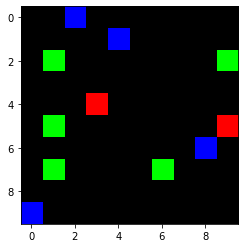

In [246]:
some_values = temp_db.run_colorization()

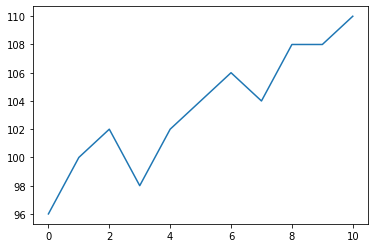

In [247]:
plt.plot(some_values)

In [201]:
some_values

[54,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [76]:
some_result = temp_db.send_improve(temp_field, 0)

In [78]:
some_result[1]

array([ 1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,
        1,  2,  2,  2,  0,  1,  0,  2,  2,  2,  1,  1,  2,  1,  0,  2,  1,
        2,  2,  0,  0,  1, -1, -1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  2,  2,  2,  2,  1,  0,  0,  0,  1,
        2,  2,  2,  2,  2,  1,  1,  0,  1,  2,  2,  2,  2])

In [72]:
np.sort(some_result[1])[-27:]

array([8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9])

In [73]:
np.argsort(some_result[1])[-26:]

array([96, 86, 85, 88, 89, 90, 95, 52, 75, 78, 98, 39, 38, 59, 35, 32, 79,
       29, 69, 26, 22, 21, 20, 76, 28, 99])

In [65]:
np.array(some_result[0])[np.argsort(some_result[1])[-26:]]

array([[9, 6],
       [8, 6],
       [8, 5],
       [8, 8],
       [8, 9],
       [9, 0],
       [9, 5],
       [5, 2],
       [7, 5],
       [7, 8],
       [9, 8],
       [3, 9],
       [3, 8],
       [5, 9],
       [3, 5],
       [3, 2],
       [7, 9],
       [2, 9],
       [6, 9],
       [2, 6],
       [2, 2],
       [2, 1],
       [2, 0],
       [7, 6],
       [2, 8],
       [9, 9]])

In [68]:
temp_field.figures

[(array([5, 7]), 'peshka'),
 (array([2, 5]), 'peshka'),
 (array([9, 2]), 'king'),
 (array([4, 0]), 'king'),
 (array([5, 4]), 'king'),
 (array([7, 1]), 'king'),
 (array([5, 7]), 'king'),
 (array([4, 7]), 'tura'),
 (array([1, 4]), 'tura'),
 (array([0, 3]), 'tura')]

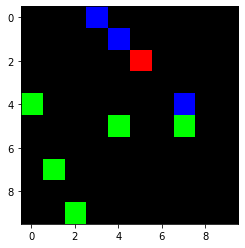

In [66]:
temp_field.show_field()

In [ ]:
class Filteringrapper(object):
    
    def __init__(
        self,
        graph,
        color_domain
    ):
        self.graph = graph
        self.color_domain = color_domain
        self.n = graph.number_of_nodes()
        self.domains = [deepcopy(color_domain) for _ in self.n]
        
        self.result = None
        
    def get_constraint(self, graph, i, v):
        if graph is None:
            return None
        for node in graph.neighbors(i):
            if graph.nodes[node]['color'] == v:
                return False
        return True    
        
    def run_colorization(self):
        self.result = self.dfs(0, self.graph)
        if self.result is None:
            print('Solution does not exist')
        else:
            print('Solution was found')
            visualise_graph(self.result)

    def filtering(self, i):
        for j in graph.neighbors(i):
            self.revise(i, j)
        
    def revise(self, i, j):
        old_domain = deepcopy(self.domains[i])
        current_domain = deepcopy(self.domains[i])
        for  v in current_domain:
            if v in self.domains[j]:
                current_domain.remove(v)
        if set(old_domain) != set(current_domain):
            for k in graph.neighbors(i):
                self.handle_new_domain(i, current_domain)
                
    def handle_new_domain(self, i, domain):
        self.domains[i] = domain
        self.revise

In [ ]:
set([1,2,3]) == set([3,2,1])